# Experimento 3

Experimento 3. Todas las comunidades sin dinámica espacial.

In [1]:
import numpy as np
import math, os, random
from scipy.integrate import odeint
from copy import deepcopy

In [2]:
%run modelo.py

In [14]:
np.set_printoptions(precision=4, suppress=True)

## Comunidades

In [3]:
files = []
with open('iteraciones.txt', 'r') as file:
    rows = file.readlines()
    for row in rows:
        files.append([row[:20], int(row[-2])])

In [4]:
all_condiciones_iniciales = [np.loadtxt("./comunidades/" + file[0][:20] + "-c.txt") for file in files]
all_tasas_reproduccion = [np.loadtxt("./comunidades/" + file[0][:20] + "-v.txt") for file in files]
all_matriz_interacciones = [np.loadtxt("./comunidades/" + file[0][:20] + '-m.txt') for file in files]

In [5]:
def modificar_matriz(m):
    for i in range(10):
        m[i][i] *= 15
    return m

def modificar_tasas(tasa):
    tasa[tasa > 0] = tasa[tasa > 0] * 20
    return tasa

def modificar_condiciones0(c0):
    c0 = c0 * 10
    return c0

In [6]:
matriz_interacciones = deepcopy(all_matriz_interacciones)
matriz_interacciones = [modificar_matriz(m) for m in matriz_interacciones]

tasas_reproduccion = deepcopy(all_tasas_reproduccion)
tasas_reproduccion = [modificar_tasas(tasa) for tasa in tasas_reproduccion]

condiciones_iniciales = deepcopy(all_condiciones_iniciales)
condiciones_iniciales = [modificar_condiciones0(c) for c in condiciones_iniciales]

In [7]:
random.seed(17)
comunidades = random.sample(range(201), 100)

## Parámetros iniciales

In [8]:
t_total = 500
tiempo = np.linspace(0, t_total, t_total+1)

## Experimento

In [9]:
def riqueza_sin_espacio(poblacion, t, bio_min=0.001):
    return (sum([i>bio_min for i in poblacion[t]]))

In [10]:
poblacion = np.zeros((len(comunidades), t_total+1, 10)) # poblacion[comunidad, tiempo, especie]
infodict = [None] * len(comunidades)

for i, m in enumerate(comunidades):
    poblacion[i], infodict[i] = odeint(lotka, condiciones_iniciales[m], tiempo, 
           args=(tasas_reproduccion[m],matriz_interacciones[m]),
        full_output=True)

C:\Users\Irene\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [11]:
[infodict[i]["message"] for item in infodict]

['Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration succes

## Riqueza

In [15]:
# Con bio_min = 0.0001
riqueza = np.zeros((len(comunidades), t_total+1))
for i in range(len(comunidades)):  
    for t in range(t_total+1):
        riqueza[i][t] = riqueza_sin_espacio(poblacion[i], t, bio_min=0.0001)   
        
riqueza_promedio = np.mean([np.mean(x[-10:]) for x in riqueza])
riqueza_promedio

7.4500000000000002

In [64]:
# Con bio_min = 15
riqueza = np.zeros((len(comunidades), t_total+1))
for i in range(len(comunidades)):  
    for t in range(t_total+1):
        riqueza[i][t] = riqueza_sin_espacio(poblacion[i], t, bio_min=15)   
        
riqueza_promedio = np.mean([np.mean(x[-10:]) for x in riqueza])
riqueza_sd = np.std([np.mean(x[-10:]) for x in riqueza])
riqueza_promedio
riqueza_sd

3.8700000000000001

2.0671477934584166

¿Cuál es la abundancia que alcanza cada especie de cada comunidad?

In [43]:
abundancia = poblacion[:, -1, :] # abundancia[comunidad, especie]

[   5.2517   -0.       45.9734    5.8159   40.0902   65.711    38.2223
   83.7342  112.3598    6.5777]


In [44]:
np.save("./datos/exp3", abundancia)

## Graficar

In [19]:
import matplotlib.pyplot as plt

In [20]:
%matplotlib inline

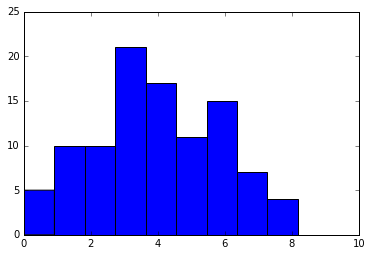

In [26]:
plt.hist([x[-1] for x in riqueza], bins=11, range=(0, 10));

In [76]:
from scipy.stats import shapiro, normaltest

In [69]:
shapiro([x[-1] for x in riqueza])

(0.9619668126106262, 0.005567459389567375)

In [72]:
normaltest([x[-1] for x in riqueza])

NormaltestResult(statistic=4.8360357304633537, pvalue=0.089098046884693319)